# Project_MAAC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statsmodels.formula.api as smf
import math
import statsmodels.formula.api as sm

In [2]:
data = pd.read_csv('data.csv', sep=';') 

## Data Cleaning & Preparation

### Binning the catogorical data

In [3]:
data['education'] = data['education'].apply(lambda x:'Primary' if 'basic' in x else 'Primary' if 'illiterate' in x else 'Secondary' if 'high.school' in x else 'Secondary' if 'professional.course' in x else 'Tertiary' if 'university.degree' in x else x)
data['job'] = data['job'].apply(lambda x:'Employed' if 'admin.' in x else 'Employed' if 'blue-collar' in x else 'Employed' if 'technician' in x else 'Employed' if 'services' in x else 'Employed' if 'management' in x else 'Employed' if 'self-employed' in x else 'Employed' if 'entrepreneur' in x else 'Unemployed' if 'retired' in x else 'Unemployed' if 'unemployed' in x else 'Unemployed' if 'housemaid' in x else 'Unemployed' if 'student' in x else x)
data['marital'] = data['marital'].apply(lambda x:'single' if 'divorce' in x else x)

### Cleaning the missing values

In [4]:
data['education']=data['education'].replace('unknown',np.NaN)
data['marital']=data['marital'].replace('unknown',np.NaN)
data['housing']=data['housing'].replace('unknown',np.NaN)
data['loan']=data['loan'].replace('unknown',np.NaN)
data['job']=data['job'].replace('unknown',np.NaN)

data.drop(['default'], axis=1, inplace = True)
data.dropna(axis=0, inplace=True)

In [5]:
data['y_dum']= data['y'].map({'no': 0, 'yes': 1})

In [6]:
data.drop(['y'], axis=1, inplace = True)

## Rename the column

In [7]:
data = data.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employed'})

## Split the Dataset

In [8]:
# Creating training and testing datasets
np.random.seed(2)
train = data.sample(round(data.shape[0]*0.8))
test = data.drop(train.index)

In [9]:
train.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
398,45,Employed,single,Tertiary,no,yes,cellular,may,fri,133,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,0
526,38,Employed,married,Tertiary,no,no,telephone,may,tue,477,11,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3707,60,Unemployed,married,Secondary,no,no,cellular,may,thu,181,3,6,1,success,-1.8,93.876,-40.0,0.699,5008.7,1
3687,30,Employed,single,Tertiary,no,no,cellular,sep,thu,327,2,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,1
618,31,Employed,married,Tertiary,no,no,telephone,may,wed,197,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [10]:
test.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
6,32,Employed,single,Tertiary,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,0
10,25,Employed,single,Primary,yes,no,cellular,jul,thu,301,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
20,55,Employed,married,Primary,yes,no,cellular,jul,tue,326,6,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
25,38,Employed,married,Secondary,yes,no,cellular,aug,mon,479,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,1
26,36,Employed,single,Secondary,no,no,telephone,may,wed,446,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0


## Data Preparation

### Check Missing Value

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y_dum             0
dtype: int64

### Check VIF


In [12]:
train_dummies=pd.get_dummies(train.iloc[:,0:])

In [13]:
X = train_dummies[['age', 'duration','campaign','pdays','previous','emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_Employed', 'marital_married', 'education_Primary', 'housing_no', 'loan_no', 'contact_cellular', 'month_mar', 'poutcome_success', 'day_of_week_fri']]

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["y_dum"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                y_dum            VIF
0               const  683321.112966
1                 age       1.179976
2            duration       1.023457
3            campaign       1.049168
4               pdays      13.636122
5            previous       1.800038
6        emp_var_rate      38.039553
7      cons_price_idx       9.754661
8       cons_conf_idx       2.911788
9           euribor3m      61.875972
10        nr_employed      32.944098
11       job_Employed       1.097603
12    marital_married       1.106985
13  education_Primary       1.084024
14         housing_no       1.019776
15            loan_no       1.007851
16   contact_cellular       2.095999
17          month_mar       1.060823
18   poutcome_success      12.647102
19    day_of_week_fri       1.005511


### Eliminate Variables based on VIF 
Disregard "pdays","emp_var_rate","cons_price_idx","euribor3m","nr_employed","poutcome" because their VIFs are larger than 5.

## EDA

### Visualization Heatmap

<AxesSubplot:>

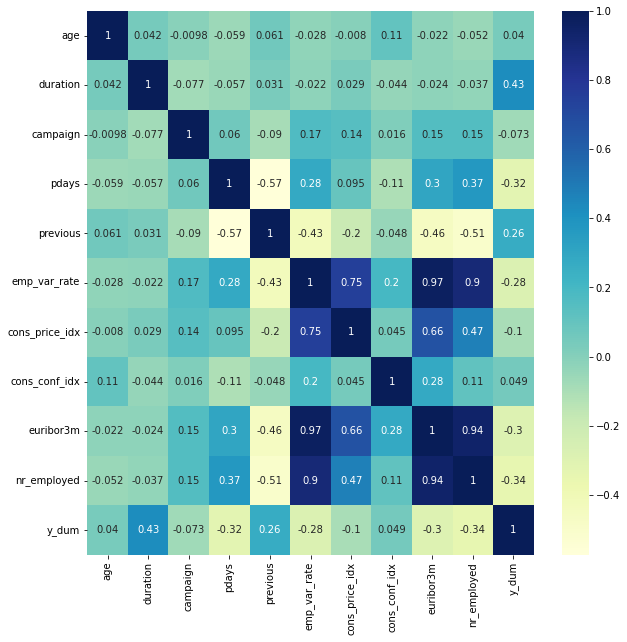

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

## Visualizations with Individual Predictors
### Visualizations for Numerical Predictors

[Text(0.5, 0, 'Campaign'), Text(0, 0.5, 'subscription_rate')]

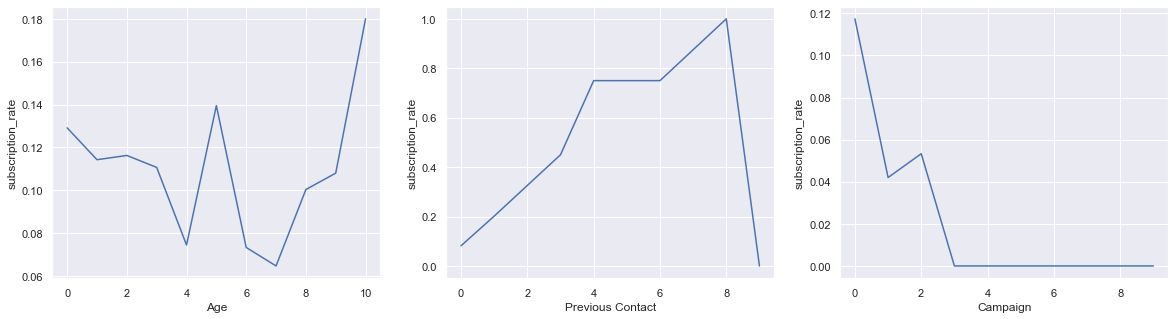

In [16]:
sns.set(rc={'figure.figsize':(20,5)})
fig, axes = plt.subplots(nrows=1, ncols=3)
#Plotting individual subplots

#Binning Age
binned_age = pd.qcut(train['age'],11,retbins=True)
train['age_binned'] = binned_age[0]
age_data = train.groupby('age_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Age Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_age = sns.lineplot(x = age_data.index, y= age_data['subscription_rate'], ax=axes[0])
ax_age.set(xlabel='Age', ylabel='subscription_rate')

#Binning number of previous contacts
binned_previous = pd.cut(train['previous'],10, retbins=True, duplicates='drop')
train['previous_binned'] = binned_previous[0]
previous_data = train.groupby('previous_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Previous Contact Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_previous = sns.lineplot(x = previous_data.index, y= previous_data['subscription_rate'], ax = axes[1])
ax_previous.set(xlabel='Previous Contact', ylabel='subscription_rate')


#Binning number of Campaign
binned_campaign = pd.cut(train['campaign'],10, retbins=True, duplicates='drop')
train['campaign_binned'] = binned_campaign[0]
campaign_data = train.groupby('campaign_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Previous Contact Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_campaign = sns.lineplot(x = campaign_data.index, y= campaign_data['subscription_rate'], ax = axes[2])
ax_campaign.set(xlabel='Campaign', ylabel='subscription_rate')

### Visualization for Categorical Variables

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'subscription_rate')]

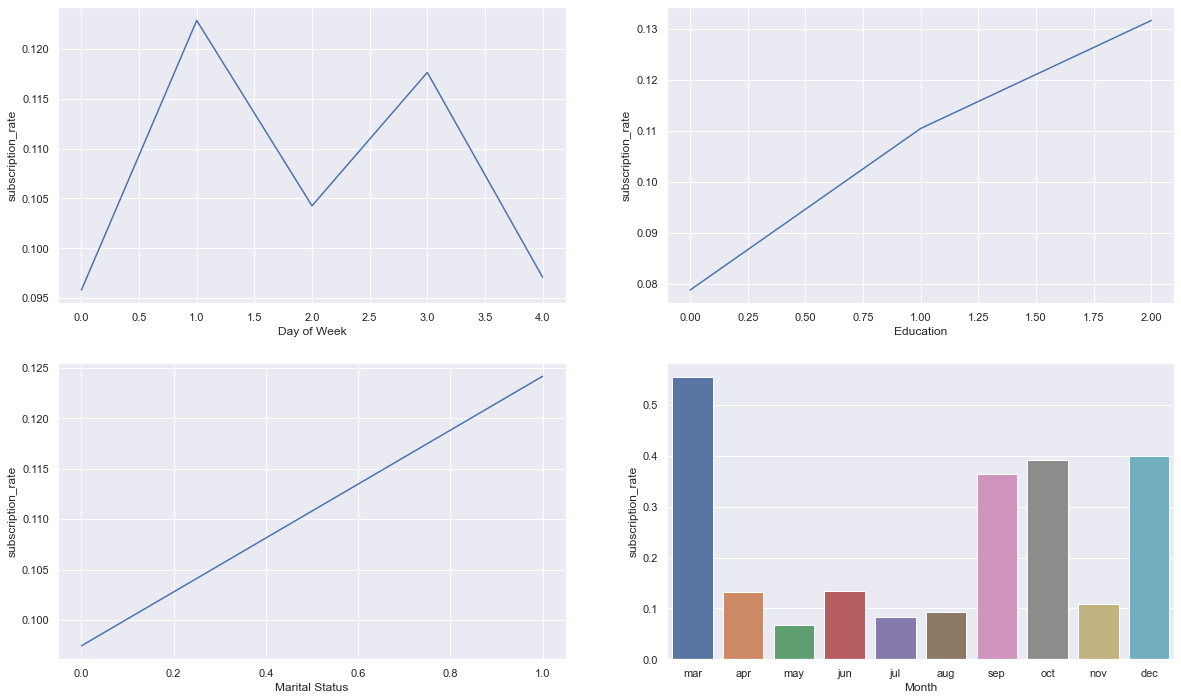

In [17]:
sns.set(rc={'figure.figsize':(20,12)})
fig, axes = plt.subplots(nrows=2, ncols=2)
#Plotting individual subplots

#Day of Week Graph
day_data = train.groupby('day_of_week')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_day = sns.lineplot(x = day_data.index, y= day_data['subscription_rate'], ax = axes[0,0])
ax_day.set(xlabel='Day of Week', ylabel='subscription_rate')

#Education Graph
edu_data = train.groupby('education')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_edu = sns.lineplot(x = edu_data.index, y= edu_data['subscription_rate'], ax = axes[0,1])
ax_edu.set(xlabel='Education', ylabel='subscription_rate')

#Marital Status Graph
marital_data = train.groupby('marital')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_marital = sns.lineplot(x = marital_data.index, y= marital_data['subscription_rate'], ax = axes[1,0])
ax_marital.set(xlabel='Marital Status', ylabel='subscription_rate')

#Month Graph
month_data = train.groupby('month')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')])
ax_month = sns.barplot(x = month_data.index, y= month_data['subscription_rate'], order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], ax = axes[1,1])
ax_month.set(xlabel='Month', ylabel='subscription_rate')


## Observations from Visualizations
**Age**:A quadratic transformation of age seems to better fit for "Age"

**Day of Week**:

**Education**

**Previous Contact**

## Model

In [18]:
from sklearn.metrics import roc_curve, auc

#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

### Baseline Model

In [19]:
train.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y_dum', 'age_binned', 'previous_binned',
       'campaign_binned'],
      dtype='object')

In [20]:
logit_model_Baseline = sm.logit(formula = 'y_dum~age+job+marital+education+housing+loan+contact+month+day_of_week+campaign+pdays+previous+poutcome+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
logit_model_Baseline.summary()

Optimization terminated successfully.
         Current function value: 0.267965
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3017
Method:                           MLE   Df Model:                           31
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.2167
Time:                        17:55:38   Log-Likelihood:                -817.03
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 2.878e-76
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -251.4789    118.053     -2.130      0.033    -482.859     -20.099
job[T.Unemployed]           0.0839      0.201      0.417      0.677      -0.311       0.478
marital[T.single]           0.0337      0.142      0.237      0.813      -0.245       0.313
education[T.Secondary]      0.1253      0.177      0.710      0.478      -0.221       0.472
education[T.Tertiary]       0.1775      0.183      0.971      0.331      -0.181       0.536
housing[T.yes]             -0.1000      0.135     -0.740      0.459      -0.365       0.165
loan[T.yes]                -0.0687      0.185     -0.371      0.710      -0.431       0.294
contact[T.telephone]       -1.2870      0.297     -4.340      0.000      -1.868      -0.706
month[T.aug]                0.1953      0.432      0.452      0.651      -0.651       1.041
month[T.dec]                0.6368      0.715      0.890      0.373      -0.765       2.038
month[T.jul]                0.1823      0.373      0.488      0.626      -0.550       0.914
month[T.jun]                0.2621      0.432      0.607      0.544      -0.584       1.108
month[T.mar]                2.1665      0.532      4.070      0.000       1.123       3.210
month[T.may]                0.0509      0.311      0.164      0.870      -0.558       0.660
month[T.nov]                0.0074      0.419      0.018      0.986      -0.813       0.828
month[T.oct]                0.5151      0.531      0.970      0.332      -0.526       1.556
month[T.sep]                0.3578      0.604      0.593      0.553      -0.825       1.541
day_of_week[T.mon]          0.1772      0.212      0.835      0.404      -0.239       0.593
day_of_week[T.thu]          0.0032      0.220      0.014      0.989      -0.428       0.434
day_of_week[T.tue]          0.2019      0.218      0.927      0.354      -0.225       0.629
day_of_week[T.wed]          0.1561      0.224      0.695      0.487      -0.284       0.596
poutcome[T.nonexistent]     0.6652      0.329      2.020      0.043       0.020       1.311
poutcome[T.success]         2.0295      0.815      2.489      0.013       0.431       3.628
age                         0.0013      0.006      0.206      0.837      -0.011       0.014
campaign                   -0.0626      0.038     -1.641      0.101      -0.137       0.012
pdays                       0.0003      0.001      0.417      0.677      -0.001       0.002
previous                    0.2528      0.202      1.251      0.211      -0.143       0.649
euribor3m                  -0.2893      0.428     -0.676      0.499      -1.128       0.550
emp_var_rate               -1.0636      0.448     -2.373      0.018      -1.942      -0.185
cons_price_idx              2.0804      0.784      2.655      0.008       0.544       3.616
cons_conf_idx               0.0724      0.027      2.635      0.008       0.019       0.126
nr_employed                 0.0111      0.010      1.164      0.244      -0.008       0.030
=====================

Classification accuracy = 89.3%
Precision = 50.7%
TPR or Recall = 45.9%
FNR = 54.1%
FPR = 5.4%
ROC-AUC = 79.3%


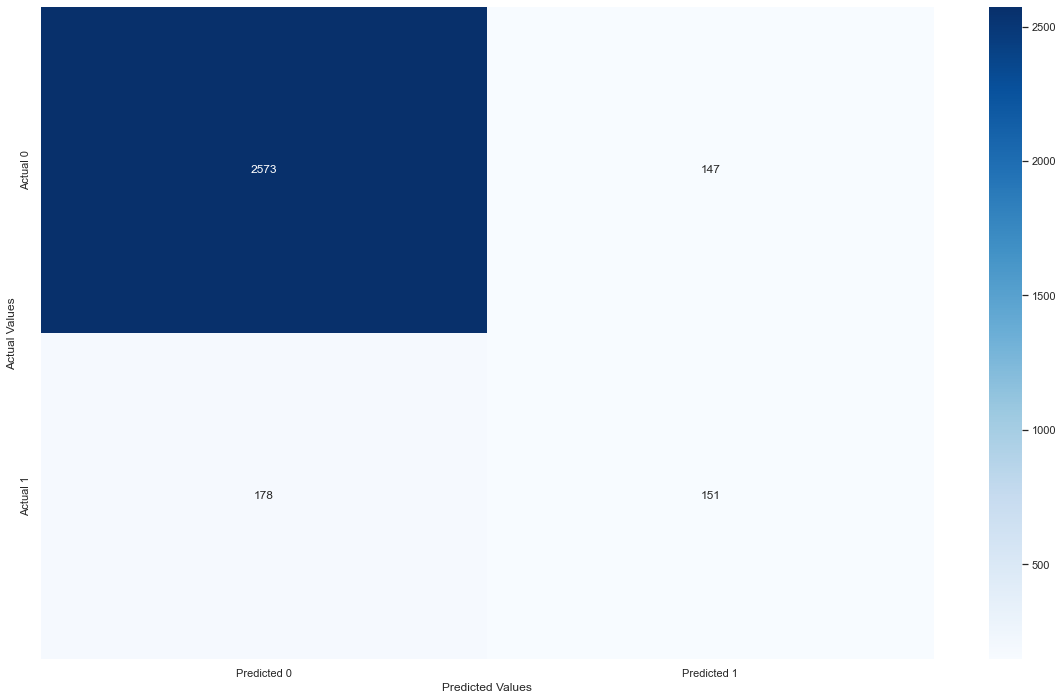

In [21]:
confusion_matrix_data(train,train.y_dum,logit_model_Baseline,0.3)

## Our Model

In [22]:
logit_model = sm.logit(formula = 'y_dum~age+I(age**2)+job+marital+education+month+day_of_week', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.316528
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3029
Method:                           MLE   Df Model:                           19
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                 0.07478
Time:                        17:55:38   Log-Likelihood:                -965.09
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 1.513e-23
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.8157      0.816     -1.000      0.317      -2.414       0.783
job[T.Unemployed]          0.2842      0.189      1.502      0.133      -0.087       0.655
marital[T.single]          0.1215      0.131      0.924      0.355      -0.136       0.379
education[T.Secondary]     0.4136      0.165      2.514      0.012       0.091       0.736
education[T.Tertiary]      0.5685      0.167      3.401      0.001       0.241       0.896
month[T.aug]              -0.5175      0.291     -1.777      0.076      -1.088       0.053
month[T.dec]               1.0542      0.597      1.767      0.077      -0.115       2.224
month[T.jul]              -0.5385      0.291     -1.851      0.064      -1.109       0.032
month[T.jun]               0.0334      0.287      0.116      0.907      -0.529       0.596
month[T.mar]               1.8476      0.422      4.374      0.000       1.020       2.676
month[T.may]              -0.6904      0.274     -2.519      0.012      -1.228      -0.153
month[T.nov]              -0.2497      0.299     -0.835      0.403      -0.835       0.336
month[T.oct]               1.1312      0.387      2.923      0.003       0.373       1.890
month[T.sep]               1.0952      0.402      2.727      0.006       0.308       1.882
day_of_week[T.mon]         0.2415      0.194      1.246      0.213      -0.138       0.621
day_of_week[T.thu]         0.0958      0.200      0.479      0.632      -0.296       0.487
day_of_week[T.tue]         0.2570      0.199      1.292      0.196      -0.133       0.647
day_of_week[T.wed]         0.1190      0.207      0.574      0.566      -0.287       0.525
age                       -0.0834      0.034     -2.448      0.014      -0.150      -0.017
I(age ** 2)                0.0010      0.000      2.660      0.008       0.000       0.002
==========================================================================================
"""

Classification accuracy = 88.7%
Precision = 44.4%
TPR or Recall = 18.2%
FNR = 81.8%
FPR = 2.8%
ROC-AUC = 67.7%


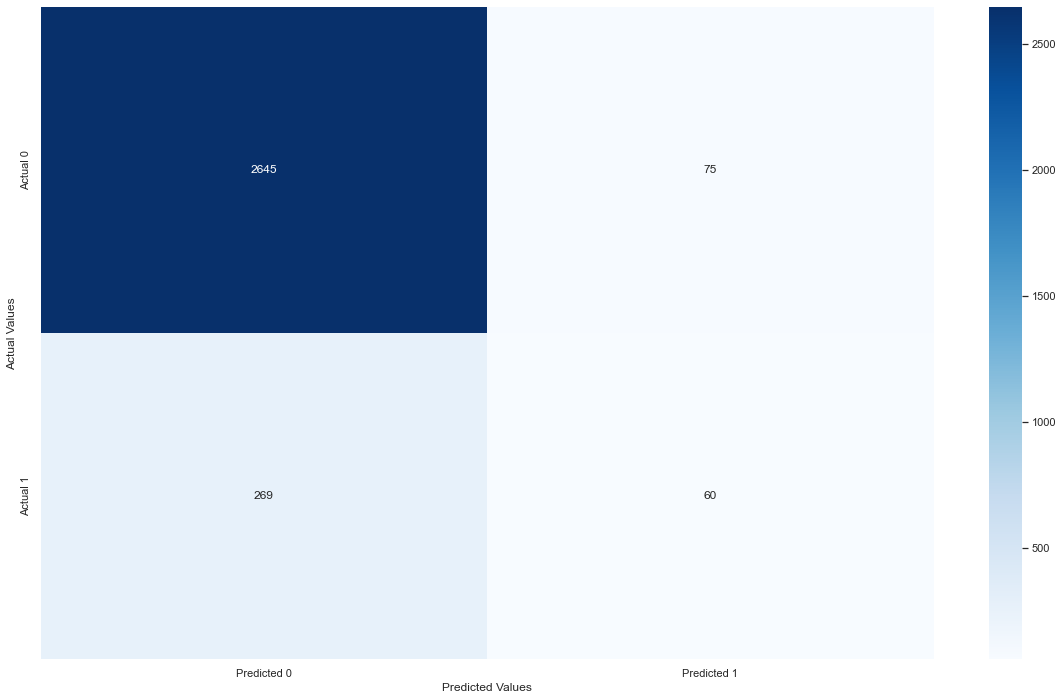

In [23]:
confusion_matrix_data(train,train.y_dum,logit_model,0.3)

Classification accuracy = 89.0%
Precision = 50.0%
TPR or Recall = 19.0%
FNR = 81.0%
FPR = 2.4%
ROC-AUC = 66.2%


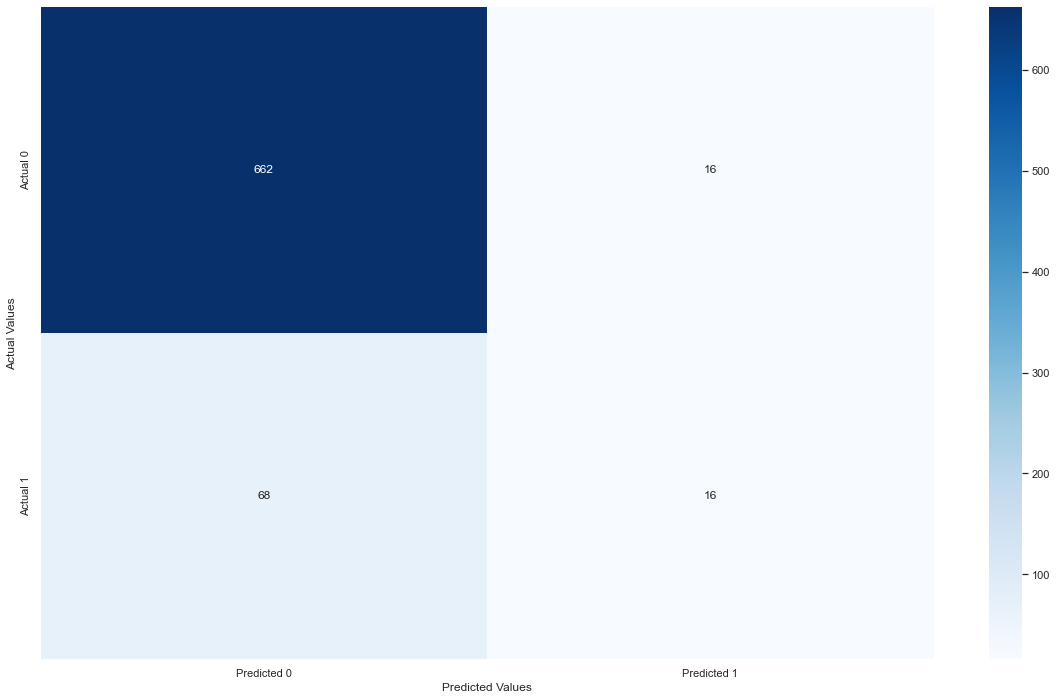

In [24]:
confusion_matrix_data(test,test.y_dum,logit_model,0.3)

0.6770058555337028


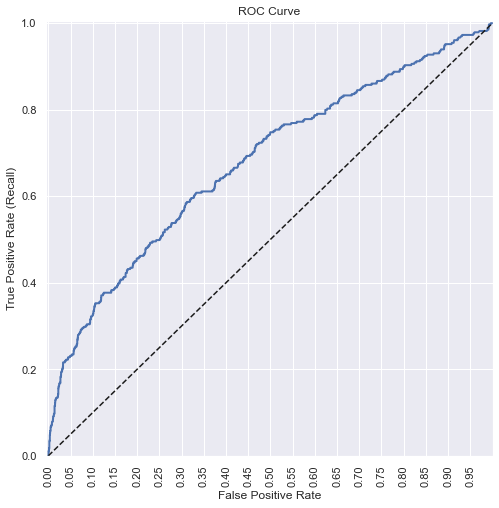

In [25]:
y=train.y_dum
ypred = logit_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

## Taking account for class imbalance

In [28]:
pip install -U imbalanced-learn

     |████████████████████████████████| 226 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 6.1 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTENC


Text(0.5, 1.0, 'Has the client subscribed a term deposit?')

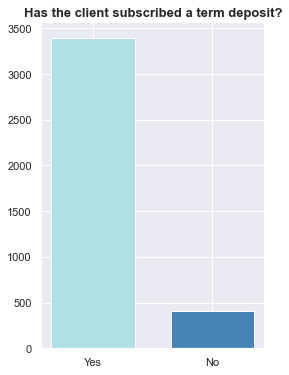

In [31]:
Subscription = {'Yes':3398, 'No':413}
YN = list(Subscription.keys())
Counts = list(Subscription.values())
  
fig = plt.figure(figsize = (4, 6))

# creating the bar plot
plt.bar(YN, Counts, color = ['powderblue', 'steelblue'], width = 0.7)
 
plt.title("Has the client subscribed a term deposit?",fontdict={'fontsize': '13', 'fontweight' : 'bold'})

In [32]:
X=data.iloc[:,:19]
y=data.iloc[:,19]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [33]:
## Balancing the train data
sm_nc = SMOTENC(categorical_features=[1,2,3,4,5,6,7,8,13], random_state=20)
X_train_res, y_train_res = sm_nc.fit_resample(X_train, y_train)

Y = pd.DataFrame(y_train_res, columns=["y_dum"])
train_smote = pd.concat([X_train_res, Y], axis = 1) 
train_smote = train_smote.reindex(columns=["age", "job", "marital", "education", "housing", "loan", "contact", "month", 'day_of_week', "duration", "campaign", "pdays", "previous", "poutcome", "emp_var_rate", "cons_price_idx", "cons_conf_idx","euribor3m", "nr_employed", "y_dum"])
train_smote.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
0,32,Unemployed,single,Tertiary,no,no,telephone,may,fri,21,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
1,51,Employed,married,Secondary,yes,no,telephone,jun,mon,81,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
2,31,Unemployed,single,Tertiary,yes,no,cellular,jul,tue,309,1,6,3,success,-1.7,94.215,-40.3,0.835,4991.6,1
3,26,Employed,married,Primary,yes,no,telephone,jun,wed,71,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
4,31,Employed,single,Primary,no,no,cellular,jul,wed,1432,5,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0


In [34]:
## Balancing the test data
sm_nc = SMOTENC(categorical_features=[1,2,3,4,5,6,7,8,13], random_state=20)
X_test_res, y_test_res = sm_nc.fit_resample(X_test, y_test)

Y = pd.DataFrame(y_test_res, columns=["y_dum"])
test_smote = pd.concat([X_test_res, Y], axis = 1) 
test_smote = train_smote.reindex(columns=["age", "job", "marital", "education", "housing", "loan", "contact", "month", 'day_of_week', "duration", "campaign", "pdays", "previous", "poutcome", "emp_var_rate", "cons_price_idx", "cons_conf_idx","euribor3m", "nr_employed", "y_dum"])
test_smote.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
0,32,Unemployed,single,Tertiary,no,no,telephone,may,fri,21,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
1,51,Employed,married,Secondary,yes,no,telephone,jun,mon,81,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
2,31,Unemployed,single,Tertiary,yes,no,cellular,jul,tue,309,1,6,3,success,-1.7,94.215,-40.3,0.835,4991.6,1
3,26,Employed,married,Primary,yes,no,telephone,jun,wed,71,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
4,31,Employed,single,Primary,no,no,cellular,jul,wed,1432,5,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0


### Testing SMOTE for Baseline Model

In [35]:
logit_model_s = sm.logit(formula = 'y_dum~age+job+marital+education+housing+loan+contact+month+day_of_week+campaign+pdays+previous+poutcome+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train_smote).fit()
logit_model_s.summary()

Optimization terminated successfully.
         Current function value: 0.475435
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 5450
Model:                          Logit   Df Residuals:                     5418
Method:                           MLE   Df Model:                           31
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.3141
Time:                        17:59:13   Log-Likelihood:                -2591.1
converged:                       True   LL-Null:                       -3777.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -121.9435     34.639     -3.520      0.000    -189.835     -54.052
job[T.Unemployed]          -1.0400      0.138     -7.552      0.000      -1.310      -0.770
marital[T.single]          -0.1438      0.075     -1.925      0.054      -0.290       0.003
education[T.Secondary]      0.3397      0.088      3.860      0.000       0.167       0.512
education[T.Tertiary]       0.1786      0.094      1.907      0.057      -0.005       0.362
housing[T.yes]              0.1958      0.072      2.736      0.006       0.056       0.336
loan[T.yes]                -1.6190      0.137    -11.854      0.000      -1.887      -1.351
contact[T.telephone]       -1.3499      0.133    -10.158      0.000      -1.610      -1.089
month[T.aug]                0.4481      0.204      2.198      0.028       0.049       0.848
month[T.dec]                1.0828      0.570      1.900      0.057      -0.034       2.200
month[T.jul]                0.3076      0.194      1.587      0.112      -0.072       0.687
month[T.jun]                0.5795      0.193      3.009      0.003       0.202       0.957
month[T.mar]                0.8601      0.368      2.335      0.020       0.138       1.582
month[T.may]                0.0560      0.159      0.352      0.725      -0.256       0.368
month[T.nov]               -0.7117      0.206     -3.459      0.001      -1.115      -0.308
month[T.oct]                1.0562      0.290      3.643      0.000       0.488       1.624
month[T.sep]               -0.7577      0.328     -2.312      0.021      -1.400      -0.115
day_of_week[T.mon]          0.1149      0.107      1.076      0.282      -0.094       0.324
day_of_week[T.thu]         -0.1789      0.110     -1.631      0.103      -0.394       0.036
day_of_week[T.tue]         -0.0630      0.113     -0.557      0.578      -0.285       0.159
day_of_week[T.wed]         -0.1432      0.117     -1.222      0.222      -0.373       0.086
poutcome[T.nonexistent]     1.3839      0.184      7.527      0.000       1.024       1.744
poutcome[T.success]         4.3391      0.678      6.396      0.000       3.010       5.669
age                         0.0087      0.004      2.384      0.017       0.002       0.016
campaign                   -0.2872      0.027    -10.810      0.000      -0.339      -0.235
pdays                       0.0009      0.001      1.312      0.190      -0.000       0.002
previous                   -0.3533      0.127     -2.781      0.005      -0.602      -0.104
euribor3m                   0.6705      0.209      3.206      0.001       0.261       1.080
emp_var_rate               -1.2607      0.164     -7.686      0.000      -1.582      -0.939
cons_price_idx              1.5893      0.219      7.260      0.000       1.160       2.018
cons_conf_idx               0.0375      0.014      2.633      0.008       0.010       0.065
nr_employed                -0.0057      0.003     -1.703      0.089      -0.012       0.001
=====================

Classification accuracy = 69.9%
Precision = 64.4%
TPR or Recall = 88.6%
FNR = 11.4%
FPR = 48.9%
ROC-AUC = 85.0%


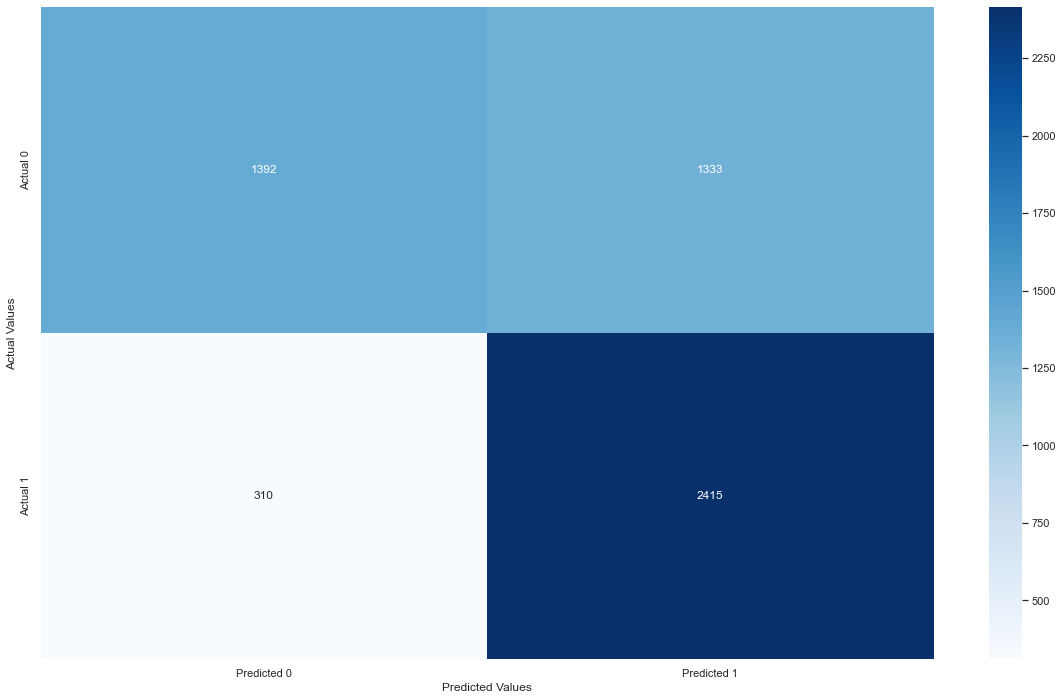

In [36]:
confusion_matrix_data(train_smote,train_smote.y_dum,logit_model_s,0.3)

Classification accuracy = 69.9%
Precision = 64.4%
TPR or Recall = 88.6%
FNR = 11.4%
FPR = 48.9%
ROC-AUC = 85.0%


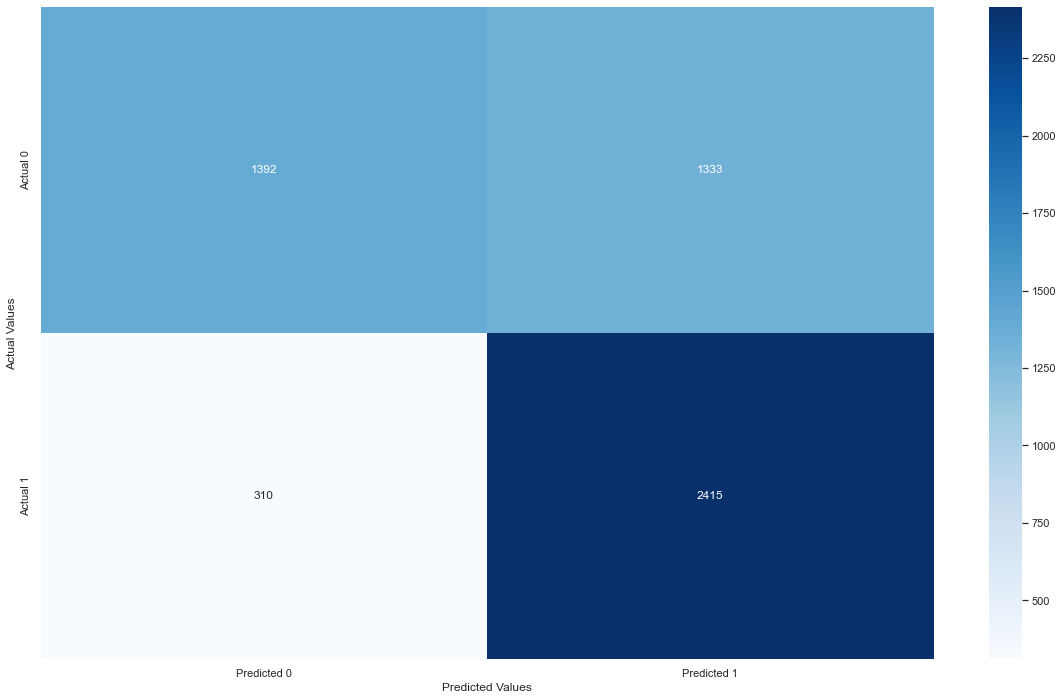

In [37]:
confusion_matrix_data(test_smote,test_smote.y_dum,logit_model_s,0.3)